## Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Read Data

In [ ]:
df_budget = pd.read_csv('campaign_budget.csv')
df_result = pd.read_csv('campaign_result.csv')
df_checkout = pd.read_csv('product_checkout.csv')

## 2. Data Cleansing

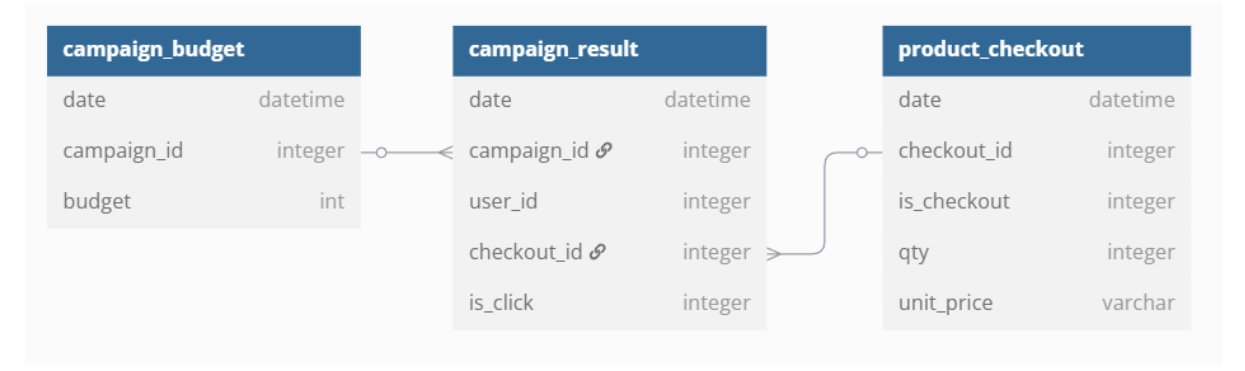

List Validasi

Durasi : 2 bulan terakhir

-Campaign Budget:
1. Campaign ID harus integer
2. Campaign ID tidak boleh missing
3. Campaign ID tidak boleh duplikat di waktu yang sama
4. Campaign ID hanya boleh 1 & 2
5. Budget harus angka
6. Budget tidak boleh < 0
7. Date harus 2 bulan terakhir

-Campaign Result:
1. Date harus 2 bulan terakhir
2. Campaign ID hanya boleh 1 & 2
3. Campaign ID tidak boleh missing
4. User ID harus integer
5. Checkout ID harus integer
6. Is_Click tidak boleh null
7. Checkout ID tidak boleh duplikat

-Product Checkout:
1. Date harus 2 bulan terakhir
2. Checkout_Id tidak boleh null
3. CHeckout_id tidak boleh duplikat
4. Checkout_id harus integer
5. qty harus integer
6. qty tidak boleh < 0
7. unit price harus integer
8. unit price tidak boleh < 0


-Merging Checkout & Result:
1. Data Checkout merupakan data dari Campaign Result
2. Date Result <= Date Checkout
3. data kolom checkout tidak masalah null (berarti hanya sebatas click atau engga, tidak sampai leads atau conversion)


date apakah sudah sesuai durasi?

In [ ]:
# List Fungsi

def check_null (dataframe):
    null_exist = False
    cols = dataframe.columns

    for col in cols:
        total = dataframe[col].isna().sum()
        if  total > 0 :
            null_exist = True
            print(f"Column {col} has null values total : {total}")
    if null_exist == False:
        print("There's no null value")

def check_duplicate(dataframe):
    duplicate_exist = False
    duplicate_total = dataframe.duplicated().sum()
    if duplicate_total > 0 :
        print("There are duplicated datas")
    else:
        print("There's no duplicate data")

def check_column_type(dataframe,columntype):
    cols = dataframe.columns
    for col in cols:
        if dataframe[col].dtype != columntype[col]:
            print(f"Incorrect data type: {col} should be {columntype[col]} ")






In [ ]:
# Validation List

campaign_id= [1,2]
is_click = [1,2]

col_type_budget = {
    'date':'datetime64[ns]',
    'campaign_id':'int',
    'budget':'int'
}

col_type_result ={
    'date':'datetime64[ns]',
    'campaign_id':'int',
    'is_checkout':'int',
    'checkout_id':'int',
    'is_click':'int',
    'user_id':'int'
}

col_type_checkout ={
    'date':'datetime64[ns]',
    'campaign_id':'int',
    'user_id':'int',
    'checkout_id':'int',
    'qty':'int',
    'unit_price':'int',
    'is_checkout':'int'
}

### Campaign budget

In [ ]:
# Check Null
check_null(df_budget)

There's no null value


In [ ]:
# Check Duplicate
check_duplicate(df_budget)

There's no duplicate data


In [ ]:
# Check Co
check_column_type(df_budget,col_type_budget)

Incorrect data type: date should be datetime64[ns] 


In [ ]:
# ubah tipe data date
df_budget['date'] = pd.to_datetime(df_budget['date'])
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         306 non-null    datetime64[ns]
 1   campaign_id  306 non-null    int64         
 2   budget       306 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 7.3 KB


In [ ]:
# Checking budget
df_budget.describe()

,date,campaign_id,budget
count,306,306.000000,306.000000
mean,2025-03-17 00:00:00,1.500000,16395.058824
min,2024-12-31 00:00:00,1.000000,13889.000000
25%,2025-02-07 00:00:00,1.000000,15363.250000
50%,2025-03-17 00:00:00,1.500000,16364.500000
75%,2025-04-24 00:00:00,2.000000,17332.750000
max,2025-06-01 00:00:00,2.000000,18758.000000
std,NaN,0.500819,1211.178926


In [ ]:
# get latest 2 month data
latest_date = df_budget['date'].max()
first_date = latest_date - pd.DateOffset(months=2)
print(first_date,latest_date)

2025-04-01 00:00:00 2025-06-01 00:00:00


In [ ]:
#latest 2 month
df_budget = df_budget[(df_budget['date'] >= first_date) & (df_budget['date'] < latest_date)]

In [ ]:
# campaign_id
df_budget = df_budget[df_budget['campaign_id'].isin(campaign_id)]

In [ ]:
df_budget.head()

,date,campaign_id,budget
182,2025-04-01,1,16765
183,2025-04-01,2,16977
184,2025-04-02,1,15082
185,2025-04-02,2,16928
186,2025-04-03,1,16748


### Campaign Result

In [ ]:
# Check null
check_null(df_result)

Column is_click has null values total : 1580


In [ ]:
# check duplicate
check_duplicate(df_result)

There's no duplicate data


In [ ]:
# check column type
check_column_type(df_result,col_type_result)

Incorrect data type: date should be datetime64[ns] 
Incorrect data type: is_click should be int 


In [ ]:
# Handling null values
df_result = df_result.dropna()
check_null(df_result)

There's no null value


In [ ]:
# Handling Column
df_result[ 'date'] = pd.to_datetime(df_result['date'], format='%Y-%m-%d')
df_result['is_click'] = df_result['is_click'].astype(int)
df_result['month'] = df_result['date'].dt.to_period('M')

/tmp/ipython-input-18-539212811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[ 'date'] = pd.to_datetime(df_result['date'], format='%Y-%m-%d')
/tmp/ipython-input-18-539212811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['is_click'] = df_result['is_click'].astype(int)
/tmp/ipython-input-18-539212811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
# data 2 bulan terakhir
df_result = df_result[(df_result['date'] >= first_date) & (df_result['date'] < latest_date)]

# campaign id harus 1 dan 2
df_result = df_result[df_result['campaign_id'].isin(campaign_id)]

In [ ]:
df_result.head()

,date,campaign_id,user_id,checkout_id,is_click,month
39103,2025-04-01,1,19125,3125247,0,2025-04
39104,2025-04-01,1,19126,3595112,0,2025-04
39106,2025-04-01,1,19128,2204955,1,2025-04
39107,2025-04-01,1,19129,6703486,0,2025-04
39108,2025-04-01,1,19130,4122267,0,2025-04


In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25450 entries, 39103 to 65157
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         25450 non-null  datetime64[ns]
 1   campaign_id  25450 non-null  int64         
 2   user_id      25450 non-null  int64         
 3   checkout_id  25450 non-null  int64         
 4   is_click     25450 non-null  int64         
 5   month        25450 non-null  period[M]     
dtypes: datetime64[ns](1), int64(4), period[M](1)
memory usage: 1.4 MB


### Campaign Checkout

In [ ]:
# Check null
check_null(df_checkout)

There's no null value


In [ ]:
# check duplicate
check_duplicate(df_checkout)

There's no duplicate data


In [ ]:
# check column type
check_column_type(df_checkout,col_type_checkout)

Incorrect data type: date should be datetime64[ns] 
Incorrect data type: unit_price should be int 


In [ ]:
# change date into date type
df_checkout['date'] = pd.to_datetime(df_checkout['date'], format='%Y-%m-%d')
df_checkout['month_checkout'] = df_checkout['date'].dt.to_period('M')

In [ ]:
# data 2 bulan terakhir
df_checkout = df_checkout[(df_checkout['date'] >= first_date) & (df_checkout['date'] < latest_date)]

In [ ]:
# change unit price data type
df_checkout['unit_price'] = df_checkout['unit_price'].str.replace('Rp ','').str.replace('.','')
df_checkout['unit_price'] = df_checkout['unit_price'].astype(int)

In [ ]:
df_checkout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4172 entries, 6242 to 10413
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4172 non-null   datetime64[ns]
 1   checkout_id     4172 non-null   int64         
 2   is_checkout     4172 non-null   int64         
 3   qty             4172 non-null   int64         
 4   unit_price      4172 non-null   int64         
 5   month_checkout  4172 non-null   period[M]     
dtypes: datetime64[ns](1), int64(4), period[M](1)
memory usage: 228.2 KB


In [ ]:
df_checkout.describe()

,date,checkout_id,is_checkout,qty,unit_price
count,4172,4.172000e+03,4172.000000,4172.000000,4172.0
mean,2025-05-01 03:30:12.080536832,5.553062e+06,0.156759,0.385187,25000.0
min,2025-04-01 00:00:00,1.003439e+06,0.000000,-1.000000,25000.0
25%,2025-04-16 00:00:00,3.336295e+06,0.000000,0.000000,25000.0
50%,2025-05-01 00:00:00,5.565226e+06,0.000000,0.000000,25000.0
75%,2025-05-16 00:00:00,7.789017e+06,0.000000,0.000000,25000.0
max,2025-05-31 00:00:00,9.998264e+06,1.000000,15.000000,25000.0
std,NaN,2.587410e+06,0.363617,1.250078,0.0


kolom quantity memiliki data yang berada dibawah 0

In [ ]:
df_checkout[df_checkout['qty'] < 0]

,date,checkout_id,is_checkout,qty,unit_price,month_checkout
6374,2025-04-02,8787086,1,-1,25000,2025-04
6463,2025-04-04,3622029,1,-1,25000,2025-04
6656,2025-04-07,1211515,1,-1,25000,2025-04
6807,2025-04-08,9457876,1,-1,25000,2025-04
7103,2025-04-13,4034741,1,-1,25000,2025-04
7110,2025-04-13,4594986,1,-1,25000,2025-04
7174,2025-04-14,7158219,1,-1,25000,2025-04
7500,2025-04-19,7983572,1,-1,25000,2025-04
7509,2025-04-19,9797024,1,-1,25000,2025-04
7560,2025-04-20,6291031,1,-1,25000,2025-04


In [ ]:
# cleaning qty column
df_checkout = df_checkout[df_checkout['qty'] >= 0]

In [ ]:
df_checkout.describe()

,date,checkout_id,is_checkout,qty,unit_price
count,4157,4.157000e+03,4157.000000,4157.000000,4157.0
mean,2025-05-01 04:18:25.027664384,5.553244e+06,0.153717,0.390185,25000.0
min,2025-04-01 00:00:00,1.003439e+06,0.000000,0.000000,25000.0
25%,2025-04-16 00:00:00,3.333134e+06,0.000000,0.000000,25000.0
50%,2025-05-01 00:00:00,5.566099e+06,0.000000,0.000000,25000.0
75%,2025-05-16 00:00:00,7.787911e+06,0.000000,0.000000,25000.0
max,2025-05-31 00:00:00,9.998264e+06,1.000000,15.000000,25000.0
std,NaN,2.587079e+06,0.360720,1.249554,0.0


### Merging Data

In [ ]:
print(len(df_result))

25450


In [ ]:
# Merging result and checkout
df_merge = pd.merge(df_result,df_checkout,on='checkout_id',how='left')
df_merge = df_merge.rename(columns={
    'date_x':'date',
    'date_y':'date_checkout'
})


In [ ]:
df_merge.isna().sum()

,0
date,0
campaign_id,0
user_id,0
checkout_id,0
is_click,0
month,0
date_checkout,22114
is_checkout,22114
qty,22114
unit_price,22114


In [ ]:
# date campaign <= date checkout
df_merge = df_merge[(df_merge['date'] <= df_merge['date_checkout']) | (df_merge['is_checkout'].isna()) ]
len(df_merge)

25182

In [ ]:
len(df_result)

25450

## Data Exploration

### Engagement

In [63]:
# Total engagement rate
engagement = (
    df_merge.groupby(by='campaign_id')
    .agg(engagement = ('is_click','sum'))
    .reset_index()
)
# engagement['engagement_rate'] = engagement['total_user'] / engagement['total_reach']
engagement

,campaign_id,engagement
0,1,1687
1,2,1658


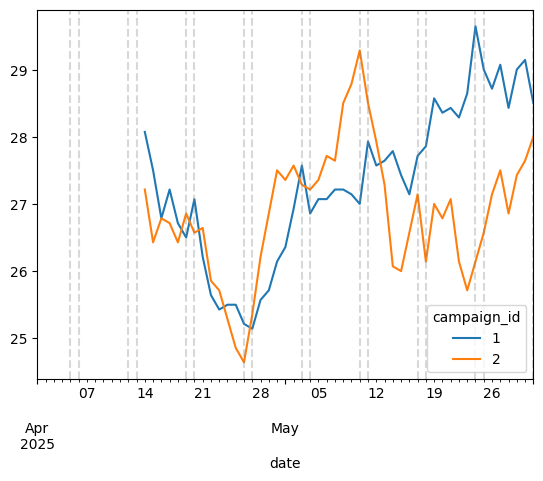

In [65]:
# Engagement per day
eng_per_day = (
    df_merge.groupby(by=['date','campaign_id'])
    .agg(engagement = ('is_click','sum'))
    .reset_index()
)
# eng_per_day['engagement_rate'] = eng_per_day['total_user'] / eng_per_day['total_reach']

eng_pivot = pd.pivot(eng_per_day,index='date',columns='campaign_id',values='engagement')
eng_pivot.rolling(window = 14).mean().plot.line()

for date in eng_pivot.index:
    if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
        plt.axvline(date, color='gray', linestyle='--', alpha=0.3)

### CTR

In [ ]:
# grouping
ctr_per_campaign = (df_merge.groupby(by = 'campaign_id')
.agg( total_click=('is_click','sum'),impressions = ('user_id','count'))
.reset_index()
)
ctr_per_campaign['ctr'] = ctr_per_campaign['total_click'] / ctr_per_campaign['impressions']
ctr_per_campaign

,campaign_id,total_click,impressions,ctr
0,1,1687,12924,0.130532
1,2,1658,12258,0.135259


In [ ]:
ctr_per_day = (
    df_merge.groupby(by=['date','campaign_id'])
    .agg(total_click = ('is_click','sum'),impressions = ('user_id','nunique'))
    .reset_index()
)

camp_a = ctr_per_day[ctr_per_day['campaign_id'] == 1].copy()
camp_b = ctr_per_day[ctr_per_day['campaign_id'] == 2].copy()

camp_a['click_roll'] = camp_a['total_click'].rolling(window=14).mean()
camp_a['impressions_roll'] = camp_a['impressions'].rolling(window=14).mean()
camp_a['ctr_roll'] = camp_a['click_roll'] / camp_a['impressions_roll']

camp_b['click_roll'] = camp_b['total_click'].rolling(window=14).mean()
camp_b['impressions_roll'] = camp_b['impressions'].rolling(window=14).mean()
camp_b['ctr_roll'] = camp_b['click_roll'] / camp_b['impressions_roll']

df_ctr = pd.concat([camp_a,camp_b],ignore_index=True).sort_values(by=['date','campaign_id'])


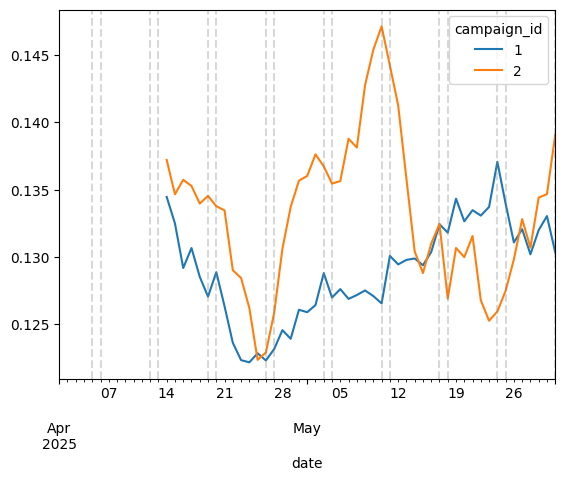

In [ ]:
ctr_pivot = pd.pivot(df_ctr,index='date',columns='campaign_id',values='ctr_roll')
ctr_pivot.plot.line()
for date in ctr_pivot.index:
    if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
        plt.axvline(date, color='gray', linestyle='--', alpha=0.3)

### Conversion Rate

In [ ]:
conversion_per_campaign = (
    df_merge[df_merge['is_click'] == 1].groupby("campaign_id")
    .agg(total_conversion=('is_checkout','sum'),total_click=('is_click','sum'))
    .reset_index()
)
conversion_per_campaign['total_conversion'] = conversion_per_campaign['total_conversion'].astype(int)
conversion_per_campaign['conversion_rate'] = conversion_per_campaign['total_conversion'] / conversion_per_campaign['total_click']
conversion_per_campaign

,campaign_id,total_conversion,total_click,conversion_rate
0,1,239,1687,0.141672
1,2,291,1658,0.175513


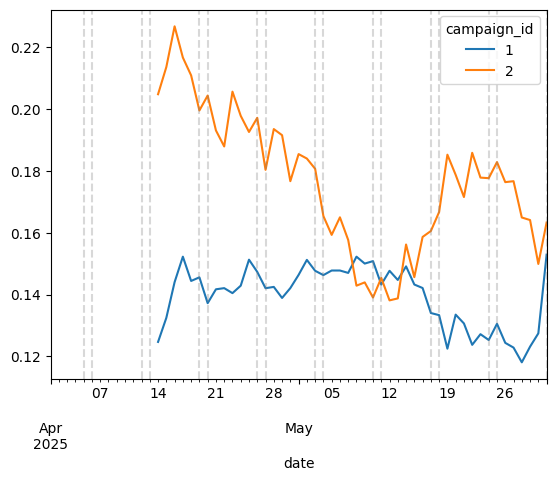

In [ ]:
conversion_per_day = (
    df_merge[df_merge['is_click'] == 1].groupby(by=["date",'campaign_id'])
    .agg(total_conversion=('is_checkout','sum'),users=('is_click','count'))
    .reset_index()

)

cvr_a = conversion_per_day[conversion_per_day['campaign_id'] == 1].copy()
cvr_b = conversion_per_day[conversion_per_day['campaign_id'] == 2].copy()

cvr_a['buyer_roll'] = cvr_a['total_conversion'].rolling(window=14).mean()
cvr_a['user_roll'] = cvr_a['users'].rolling(window=14).mean()
cvr_a['cvr_roll'] = cvr_a['buyer_roll'] / cvr_a['user_roll']

cvr_b['buyer_roll'] = cvr_b['total_conversion'].rolling(window=14).mean()
cvr_b['user_roll'] = cvr_b['users'].rolling(window=14).mean()
cvr_b['cvr_roll'] = cvr_b['buyer_roll'] / cvr_b['user_roll']

df_cvr = pd.concat([cvr_a,cvr_b],ignore_index=True).sort_values(by=['date','campaign_id'])

conversion_pivot = pd.pivot(df_cvr,index='date',columns='campaign_id',values='cvr_roll')
conversion_pivot.plot.line()

for date in conversion_pivot.index:
    if date.weekday() >= 5:
        plt.axvline(date, color='gray', linestyle='--', alpha=0.3)


In [ ]:
df_cvr

,date,campaign_id,total_conversion,users,conversion_roll,user_roll,cvr_roll
0,2025-04-01,1,3.0,31,NaN,NaN,NaN
61,2025-04-01,2,1.0,32,NaN,NaN,NaN
1,2025-04-02,1,1.0,34,NaN,NaN,NaN
62,2025-04-02,2,2.0,28,NaN,NaN,NaN
2,2025-04-03,1,2.0,25,NaN,NaN,NaN
...,...,...,...,...,...,...,...
119,2025-05-29,2,3.0,28,4.500000,27.428571,0.164062
59,2025-05-30,1,6.0,28,3.714286,29.142857,0.127451
120,2025-05-30,2,4.0,34,4.142857,27.642857,0.149871
60,2025-05-31,1,10.0,29,4.357143,28.500000,0.152882


<Axes: xlabel='month', ylabel='conversion_rate'>

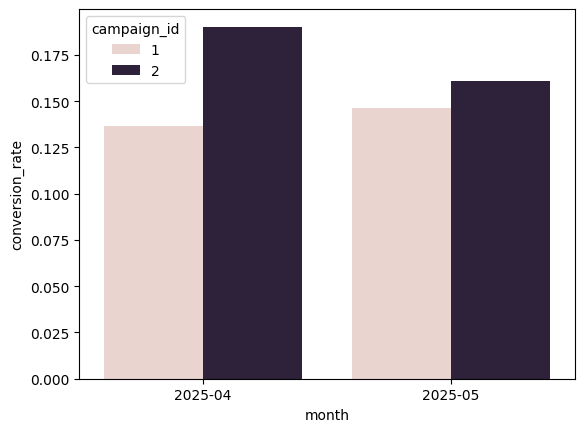

In [ ]:
# Conversion per bulan
conversion_month = (
    df_merge[df_merge['is_click'] == 1].groupby(by=["month",'campaign_id'])
    .agg(total_conversion=('is_checkout','sum'),audiens=('is_click','count'))
    .reset_index()
)

conversion_month['total_conversion'] = conversion_month['total_conversion'].astype(int)
conversion_month['conversion_rate'] = conversion_month['total_conversion'] / conversion_month['audiens']

sns.barplot(conversion_month,x='month',y='conversion_rate',hue='campaign_id')

In [ ]:
conversion_month

,month,campaign_id,total_conversion,audiens,conversion_rate
0,2025-04,1,110,806,0.136476
1,2025-04,2,156,820,0.190244
2,2025-05,1,129,881,0.146425
3,2025-05,2,135,838,0.161098


Berdasarkan perhitungan bulanan , campaign 1 mengalami kenaikan sebesar 7.35 % dan campaign 2 mengalamai penurunan sebesar 15.32 %

### Revenue

In [ ]:

df_revenue = df_merge[(df_merge['is_checkout'] == 1) & df_merge['is_click'] == 1].copy()
df_revenue['total'] = df_revenue['unit_price'] * df_revenue['qty']

revenue_per_campaign = (
    df_revenue.groupby('campaign_id')
    .agg(total_transaction = ('user_id','count'),total_qty = ('qty','sum'),
         med_qty = ('qty','median'),mean_qty=('qty','mean'),
         total=('total','sum'))
    .reset_index()
)
revenue_per_campaign


,campaign_id,total_transaction,total_qty,med_qty,mean_qty,total
0,1,239,827.0,3.0,3.460251,20675000.0
1,2,291,592.0,2.0,2.034364,14800000.0


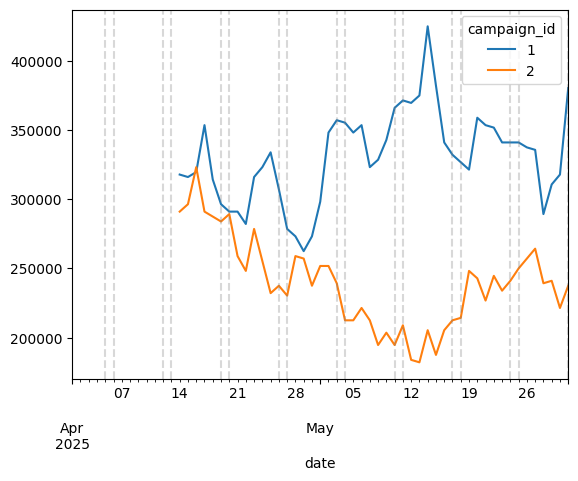

In [ ]:
revenue_per_day = df_revenue.groupby(by=['date','campaign_id'])['total'].sum().reset_index()

revenue_pivot = pd.pivot(revenue_per_day,index='date',columns='campaign_id',values='total')
revenue_pivot.rolling(window=14).mean().plot.line()

for date in revenue_pivot.index:
    if date.weekday() >= 5:
        plt.axvline(date, color='gray', linestyle='--', alpha=0.3)

### CPL

In [ ]:
#CPL

leads_per_campaign = (
    df_merge
    .groupby('campaign_id')
    .agg(leads = ('user_id','nunique'))
    .reset_index()
)

cost_per_campaign =(
    df_budget.groupby('campaign_id')
    .agg(cost = ('budget','sum'))
    .reset_index()
)

lead_cost_df = pd.merge(cost_per_campaign,leads_per_campaign,on='campaign_id')
lead_cost_df['cpl'] = lead_cost_df['cost'] / lead_cost_df['leads']
lead_cost_df

,campaign_id,cost,leads,cpl
0,1,1009572,12924,78.116063
1,2,992090,12258,80.934084


In [ ]:
# per date
leads_campaign_date = (
    df_merge
    .groupby(by=['date','campaign_id'])
    .agg(leads = ('user_id','nunique'))
    .reset_index()
)
cpl_campaign_date = pd.merge(df_budget,leads_campaign_date,on=['date','campaign_id']).sort_values(by=['campaign_id','date'])


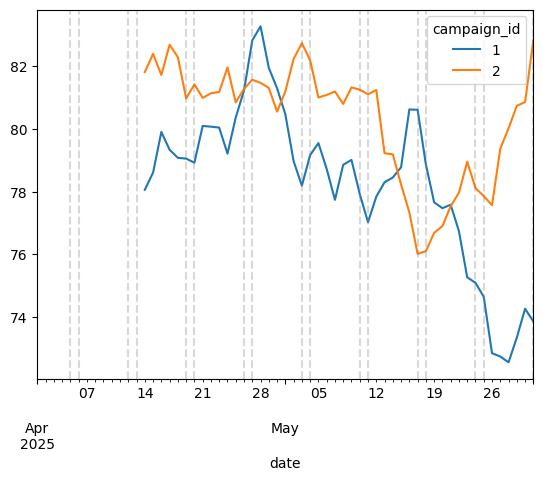

In [ ]:
cpl_a = cpl_campaign_date[cpl_campaign_date['campaign_id'] == 1].copy()
cpl_b = cpl_campaign_date[cpl_campaign_date['campaign_id'] == 2].copy()

cpl_a['budget_roll'] = cpl_a['budget'].rolling(window=14).mean()
cpl_a['leads_roll'] = cpl_a['leads'].rolling(window=14).mean()
cpl_a['cpl_roll'] = cpl_a['budget_roll'] / cpl_a['leads_roll']

cpl_b['budget_roll'] = cpl_b['budget'].rolling(window=14).mean()
cpl_b['leads_roll'] = cpl_b['leads'].rolling(window=14).mean()
cpl_b['cpl_roll'] = cpl_b['budget_roll'] / cpl_b['leads_roll']

df_cpl = pd.concat([cpl_a,cpl_b],ignore_index=True).sort_values(by=['date','campaign_id'])

cpl_pivot = pd.pivot(df_cpl,index='date',columns='campaign_id',values='cpl_roll')
cpl_pivot.plot.line()
for date in cpl_pivot.index:
    if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
        plt.axvline(date, color='gray', linestyle='--', alpha=0.3)

### CAC

In [ ]:
cust_per_campaign = (
    df_merge[(df_merge['is_checkout'] == 1) & (df_merge['is_click'] == 1)]
    .groupby('campaign_id')
    .agg(total_cust = ('user_id','nunique'))
    .reset_index()
)

budget_per_campaign =(
    df_budget.groupby('campaign_id')
    .agg(cost = ('budget','sum'))
    .reset_index()
)

cust_budget_df = pd.merge(budget_per_campaign,cust_per_campaign,on='campaign_id')
cust_budget_df['cac']  = cust_budget_df['cost'] / cust_budget_df['total_cust']
cust_budget_df

,campaign_id,cost,total_cust,cac
0,1,1009572,239,4224.150628
1,2,992090,291,3409.243986


In [ ]:
df_cust_date = (
    df_merge[(df_merge['is_checkout'] == 1) & (df_merge['is_click'] == 1)]
    .groupby(by=['date','campaign_id'])
    .agg(total_cust = ('user_id','nunique'))
    .reset_index()
)

cac_date = pd.merge(df_budget,df_cust_date,on=['date','campaign_id'])

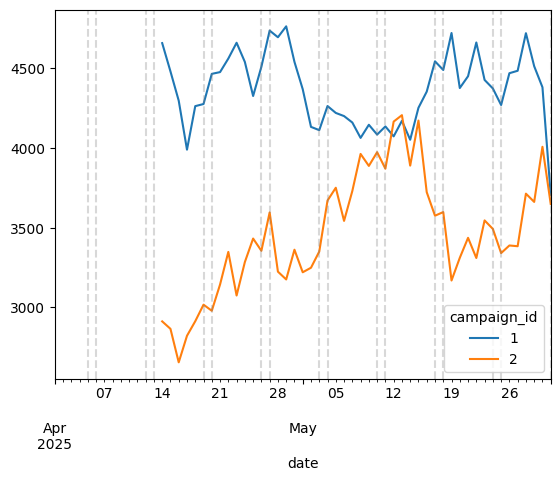

In [ ]:
cac_a = cac_date[cac_date['campaign_id'] == 1].copy()
cac_b = cac_date[cac_date['campaign_id'] == 2].copy()

cac_a['budget_roll'] = cac_a['budget'].rolling(window=14).mean()
cac_a['cust_roll'] = cac_a['total_cust'].rolling(window=14).mean()
cac_a['cac_roll'] = cac_a['budget_roll'] / cac_a['cust_roll']

cac_b['budget_roll'] = cac_b['budget'].rolling(window=14).mean()
cac_b['cust_roll'] = cac_b['total_cust'].rolling(window=14).mean()
cac_b['cac_roll'] = cac_b['budget_roll'] / cac_b['cust_roll']

df_cac = pd.concat([cac_a,cac_b],ignore_index=True).sort_values(by=['date','campaign_id'])

cac_pivot = pd.pivot(df_cac,index='date',columns='campaign_id',values='cac_roll')
cac_pivot.plot.line()
for date in cac_pivot.index:
    if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
        plt.axvline(date, color='gray', linestyle='--', alpha=0.3)

### Hipotesis Testing

H0 : Conversion Rate Campaign A >= Converison Rate Campaign B

H1 : Conversion Rate Campaign A < Conversion Rate Campaign B

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

alpha = 0.05
customer = [239,291]
total_click = [1687,1658]

zstat_ctr, pval_ctr = proportions_ztest(customer ,total_click,alternative='smaller')
print(zstat_ctr,pval_ctr)

if pval_ctr < alpha :
    print("tolak H0: Conversion Rate campaign B lebih besar daripada campaign A")
else:
    print("Gagal Tolak H0")

z_critical = norm.ppf(alpha)
print(z_critical)
if zstat_ctr < z_critical:
    print("tolak H0: Ada perbedaan signifikan conversion rate antara campaign A dan B")
else:
    print("Gagal Tolak H0")

-2.6798758934721714 0.0036824730277870634
tolak H0: Ada perbedaan signifikan conversion rate antara campaign A dan B
-1.6448536269514729
tolak H0: Ada perbedaan signifikan conversion rate antara campaign A dan B


In [66]:
# engagement
alpha = 0.05

total_click = [1687,1658]
total_impression = [12924,12258]

stat_eng, pval_eng = proportions_ztest(total_click ,total_impression,alternative='smaller')
print(stat_eng,pval_eng)

if pval_eng < alpha :
    print("tolak H0: Ada perbedaan signifikan engagement antara campaign A dan B")
else:
    print("gagal tolak H0")

z_critical = norm.ppf(alpha)
if stat_eng < z_critical:
    print("tolak H0: Ada perbedaan signifikan conversion rate antara campaign A dan B")
else:
    print("Gagal Tolak H0")

-1.1045281627828247 0.13468204690424923
gagal tolak H0
Gagal Tolak H0
